# Regressão linear:
[Notebook Fonte](https://github.com/chcomin/curso-visao-computacional-2024/blob/main/M02_aprendizado_de_maquina/1%20-%20Regress%C3%A3o%20Linear.ipynb):
Este notebook é baseado no curso de Visão Computacional, ofertado pelo professor doutor Cesar Comin, pela Universidade Federal de São Carlos.<br>



Vamos considerar o problema de prever a idade de um conjunto de crianças e jovens com idade entre 1 e 20 anos a partir da altura delas

### Leitura dos dados

(0.0, 1.8)

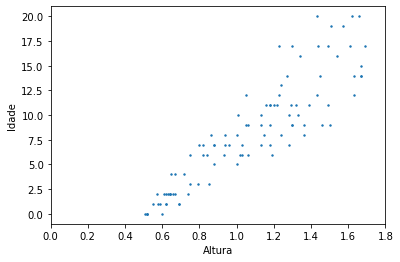

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('../data/age_data_1.txt')
x, y = data.T

plt.scatter(x, y, s=2)
plt.xlabel('Altura')
plt.ylabel('Idade')
plt.xlim((0,1.8))

### Modelo linear

Vamos definir um modelo linear para representar os dados. Vamos supor que a idade de uma pessoa é dada por

$y_m = ax + b$

onde x é a altura e y a idade.

A regressão linear é uma técnica estatística usada para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. Neste contexto, o modelo linear proposto:

$y_m = ax + b$

é usado para representar a relação entre a altura (x) e a idade (y) de uma pessoa.

- **y_m**: É a idade prevista pelo modelo. É a variável dependente que estamos tentando prever com base na altura.

- **x**: É a altura da pessoa, a variável independente que usamos para prever a idade.

- **a**: É o coeficiente angular da linha reta. Ele representa a taxa de variação da idade em relação à altura. Se o valor de a for positivo, significa que à medida que a altura aumenta, a idade prevista também aumenta. Se for negativo, significa que à medida que a altura aumenta, a idade prevista diminui.

- **b**: É o intercepto y da linha reta. Ele representa a idade prevista quando a altura é zero. Embora não faça sentido prático ter uma altura de zero, o intercepto y é importante para determinar a posição da linha reta no gráfico.

O objetivo da regressão linear é encontrar os valores de **a** e **b** que melhor se ajustam aos dados observados, minimizando a soma dos quadrados das diferenças entre as idades observadas e as idades previstas pelo modelo. Esse processo é conhecido como ajuste de mínimos quadrados.

Para ajustar o modelo aos dados, geralmente usamos métodos estatísticos ou de aprendizado de máquina para estimar os valores de **a** e **b** que minimizam a função de custo, que é frequentemente a soma dos erros quadráticos entre as idades observadas e previstas.

Uma vez que o modelo é ajustado, podemos usá-lo para prever a idade de uma pessoa com base em sua altura, inserindo o valor da altura no modelo e calculando a idade prevista correspondente.

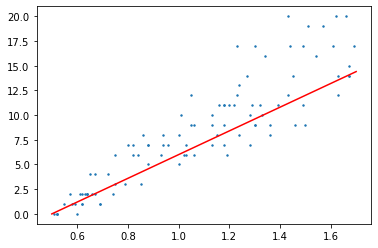

In [2]:
class Model:
    """Modelo linear com parâmetros `a` e `b`."""

    def __init__(self, a, b):

        self.a = a
        self.b = b

    def __call__(self, x):
        y = self.a*x + self.b
        return  y
    
    def copy(self):
        return Model(self.a, self.b)

model = Model(a=12, b=-6)

xm = np.linspace(0.5, 1.7)
ym = model(xm)

plt.scatter(x, y, s=2)
plt.plot(xm, ym, 'r')

### Erro quadrático médio

O erro quadrático médio (MSE, do inglês "Mean Squared Error") é uma medida comumente usada para avaliar o desempenho de um modelo de regressão, como o modelo linear mencionado anteriormente. Ele quantifica a diferença entre os valores previstos pelo modelo e os valores reais observados. Vamos detalhar a fórmula:

$$mse = \frac{1}{n}\sum_{i=1}^{n}(y(i)-y_m(i))^2$$

- **n**: É o número total de observações ou pontos de dados no conjunto de dados.

- **y(i)**: É o valor real da variável dependente (por exemplo, idade) para a i-ésima observação.

- **y_m(i)**: É o valor previsto pelo modelo para a i-ésima observação. No contexto do modelo linear, seria calculado como $y_m(i) = ax(i) + b$, onde x(i) é o valor da variável independente (por exemplo, altura) para a i-ésima observação.

- **$(y(i) - y_m(i))^2$**: É o quadrado da diferença entre o valor real e o valor previsto para a i-ésima observação. O quadrado é usado para garantir que as diferenças negativas não se cancelem com as diferenças positivas.

- **$\frac{1}{n}\sum_{i=1}^{n}$**: É a média dos quadrados das diferenças para todas as observações. Isso significa que somamos todas as diferenças quadradas e depois dividimos pelo número total de observações.

O MSE é uma medida de erro que é sempre não negativa, e valores menores indicam um melhor ajuste do modelo aos dados. Um MSE igual a zero significa que o modelo é perfeito e não há diferença entre os valores previstos e os reais. Na prática, um MSE de zero é raro, e o objetivo é minimizar o MSE para melhorar a precisão do modelo.

In [3]:
def mse(model, x, y):

    ym = model(x)
    error = np.mean((y-ym)**2)

    return error

error = mse(model, x, y)
print(error)

8.027488


Vamos criar funções para plotar o erro que teríamos se modificássemos os parâmetros do nosso modelo

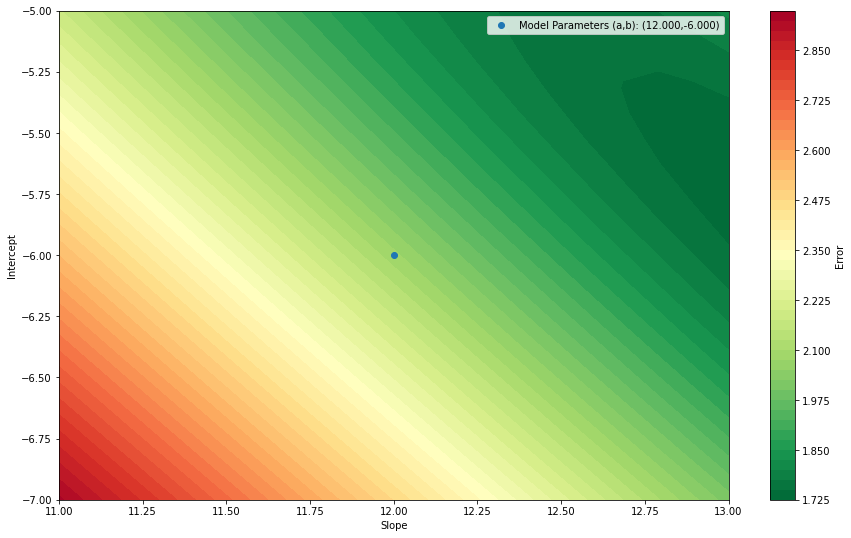

In [4]:
def get_local_error(model, x, y, range_a=1., range_b=1.):
    '''Calcula o erro quadrático médio entre `x` e `y` para combinações de 
    parâmetros do modelo no intervalo [a-range_a, a+range_a] e [b-range_b, b+range_b].'''
    
    # Número de pontos
    size = 20
    a, b = model.a, model.b

    a_vals = np.linspace(a-range_a, a+range_a, size)
    b_vals = np.linspace(b-range_b, b+range_b, size)
    # Combinações dos parâmetros
    a_grid, b_grid = np.meshgrid(a_vals, b_vals)
    # Avalia o modelo para cada combinação
    error_grid = np.zeros_like(a_grid)
    for i, b_val in enumerate(b_vals):
        for j, a_val in enumerate(a_vals):
            model_close = Model(a_val, b_val)
            error = mse(model_close, x, y)
            error_grid[i,j] = error
            
    return error_grid, a_grid, b_grid

def plot_local_error(model, x, y, range_a=1., range_b=1.):
    '''Plota o erro quadrático médio para diversos parâmetros do modelo.'''
    
    error_grid, a_grid, b_grid = get_local_error(model, x, y, range_a, range_b)
    
    plt.figure(figsize=(15,9))
    # A função np.log ajuda a diferenciar valores muito parecidos
    plt.contourf(a_grid, b_grid, np.log(error_grid), levels=50, cmap='RdYlGn_r')

    cbar = plt.colorbar()
    cbar.set_label('Error')
    plt.scatter(model.a, model.b, label=f'Model Parameters (a,b): ({model.a:.3f},{model.b:.3f})')
    plt.xlabel('Slope')
    plt.ylabel('Intercept')
    plt.legend()


plot_local_error(model, x, y)

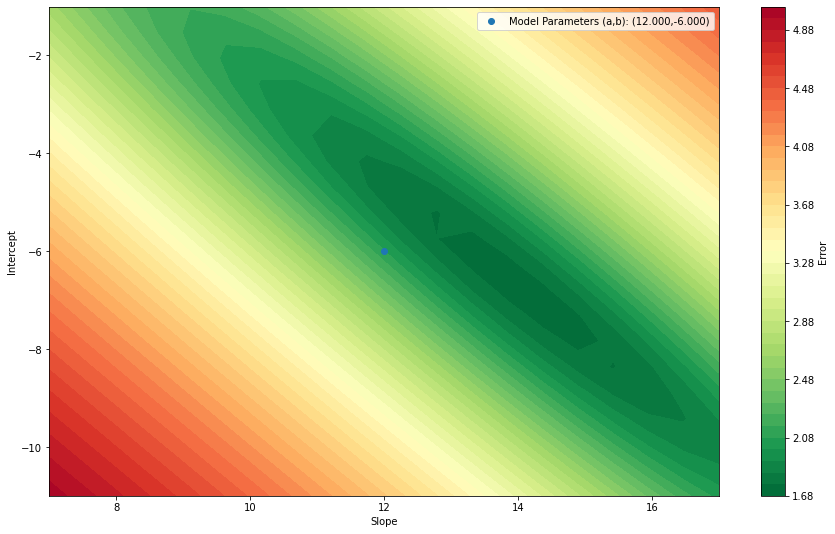

In [5]:
# Visualizando um intervalo maior de parâmetros
plot_local_error(model, x, y, range_a=5, range_b=5)

## Otimização de gradiente descendente(Notas de Aula - pgs 14 a 16)

O gradiente do erro quadrático médio é calculado como

$$
\frac{\partial{mse}}{\partial{a}} = -\frac{2}{n}\sum_{i=1}^n (y(i)-ax(i)-b)x(i)
$$
$$
\frac{\partial{mse}}{\partial{b}} = -\frac{2}{n}\sum_{i=1}^n (y(i)-ax(i)-b)
$$

O gradiente descendente é um algoritmo de otimização usado para encontrar os valores dos parâmetros de um modelo que minimizam a função de custo. No contexto da regressão linear, a função de custo geralmente é o erro quadrático médio (MSE). O objetivo do gradiente descendente é ajustar os parâmetros do modelo, neste caso, $a$ e $b$, de forma a minimizar o MSE.

## Cálculo dos gradientes do MSE

Os gradientes do MSE em relação aos parâmetros $a$ e $b$ são calculados como segue:

### Gradiente do MSE em relação a $a$

O gradiente do MSE em relação a $a$ é a derivada parcial do MSE em relação a $a$. Para calcular essa derivada, aplicamos a regra da cadeia na função $(y_i - (ax_i + b))^2$:

$$ \frac{\partial}{\partial a} (y_i - (ax_i + b))^2 = 2(y_i - ax_i - b)(-x_i) $$

Agora, aplicamos a definição do MSE na derivada:

$$ \frac{\partial{mse}}{\partial{a}} = \frac{\partial}{\partial a} \left( \frac{1}{n} \sum_{i=1}^{n} (y_i - (ax_i + b))^2 \right) $$

$$ = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - ax_i - b)(-x_i) $$

$$ = -\frac{2}{n} \sum_{i=1}^{n} (y_i - ax_i - b)x_i $$

Portanto, o gradiente do MSE em relação a $a$ é:

$$ \frac{\partial{mse}}{\partial{a}} = -\frac{2}{n} \sum_{i=1}^{n} (y(i) - ax(i) - b)x(i) $$

Esse gradiente indica como o MSE muda com uma pequena variação no parâmetro $a$. Ele é usado no algoritmo de gradiente descendente para ajustar o valor de $a$ e minimizar o MSE, melhorando assim o ajuste do modelo de regressão linear aos dados.

- **Gradiente do MSE em relação a $b$**:
  $$ \frac{\partial{mse}}{\partial{b}} = -\frac{2}{n}\sum_{i=1}^n (y(i)-ax(i)-b) $$
  Este gradiente mede a taxa de variação do MSE em relação a mudanças no parâmetro $b$. Ele é calculado como a média dos erros de predição $(y(i) - ax(i) - b)$.

### Atualização dos parâmetros

Os parâmetros $a$ e $b$ são atualizados iterativamente usando os gradientes calculados:

$$ a \leftarrow a - \alpha \frac{\partial{mse}}{\partial{a}} $$
$$ b \leftarrow b - \alpha \frac{\partial{mse}}{\partial{b}} $$

- **$\alpha$** é a taxa de aprendizado, um hiperparâmetro que controla o tamanho do passo na direção oposta ao gradiente. Um valor muito pequeno de $\alpha$ pode tornar a convergência lenta, enquanto um valor muito grande pode fazer com que o algoritmo salte sobre o mínimo e possivelmente divergir.

O processo de atualização dos parâmetros continua até que o algoritmo alcance a convergência, ou seja, até que os valores de $a$ e $b$ não mudem significativamente entre as iterações, indicando que o mínimo da função de custo foi encontrado.

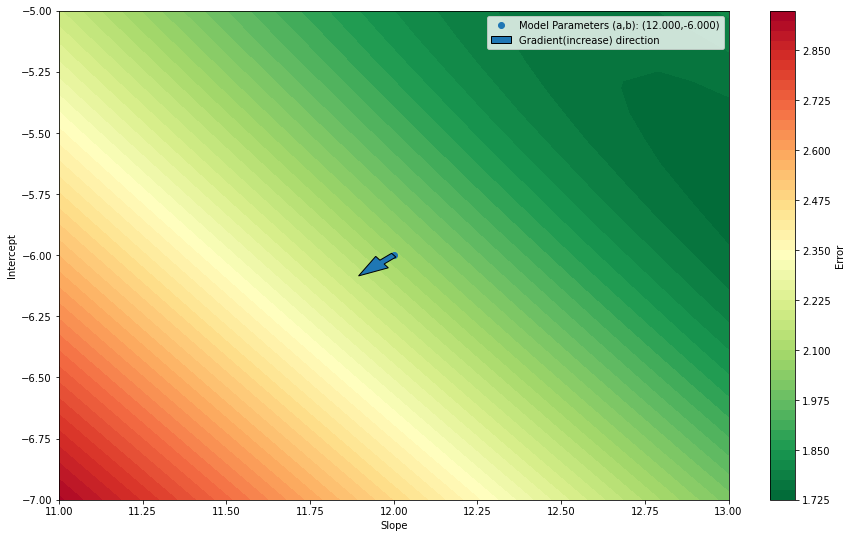

In [6]:
def mse_grad(model, x, y):
    '''Gradiente do erro quadrático médio.'''

    n = len(x)
    ym = model(x)
    grad_a = -2*np.sum((y-ym)*x)/n
    grad_b = -2*np.sum(y-ym)/n

    return grad_a, grad_b

grad = mse_grad(model, x, y)

plot_local_error(model, x, y)
# Plota uma seta na direção do gradiente
plt.arrow(model.a, model.b, 0.01*grad[0], 0.01*grad[1], width=0.02, label='Gradient(increase) direction')
plt.legend()

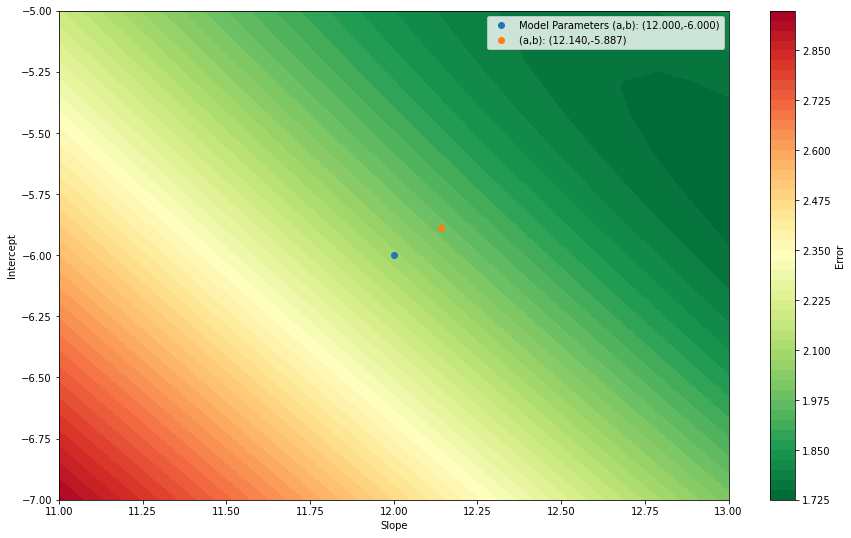

In [7]:
def step(model, x, y, lr):
    '''Dá um passo de gradiente descendente. Os parâmetros do modelo
    são modificados in-place.'''

    grad = mse_grad(model, x, y)
    # Modifica os parâmetros na direção contrária do gradiente
    model.a = model.a - lr*grad[0]
    model.b = model.b - lr*grad[1]

# Copia modelo original para plotar
model_or = model.copy()

step(model, x, y, lr=0.04)
plot_local_error(model_or, x, y)
plt.scatter(model.a, model.b, label=f'(a,b): ({model.a:.3f},{model.b:.3f})')
plt.legend()

Vamos tentar dar um passo um pouco maior

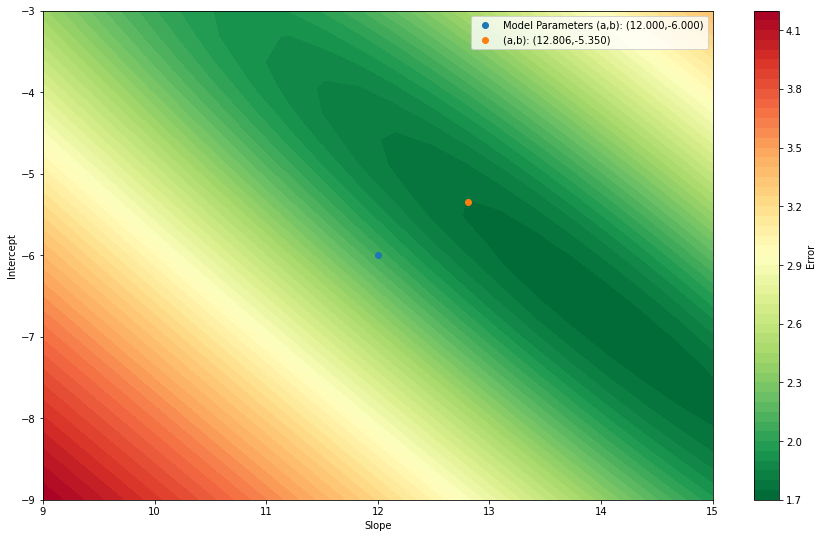

In [8]:
model = model_or.copy()

step(model, x, y, lr=0.23)
plot_local_error(model_or, x, y, range_a=3, range_b=3)
plt.scatter(model.a, model.b, label=f'(a,b): ({model.a:.3f},{model.b:.3f})')
plt.legend()

Vamos dar mais um passo usando gradiente descendente, esse experimento mostra que o resultado do gradiente do segundo passo é menor, isso é devido ao gradiente ser uma função quadrática(para esse caso) o que faz com que o segundo passo seja naturalmente menor que o primeiro, apesar de ser a mesma taxa de aprendizagem. 

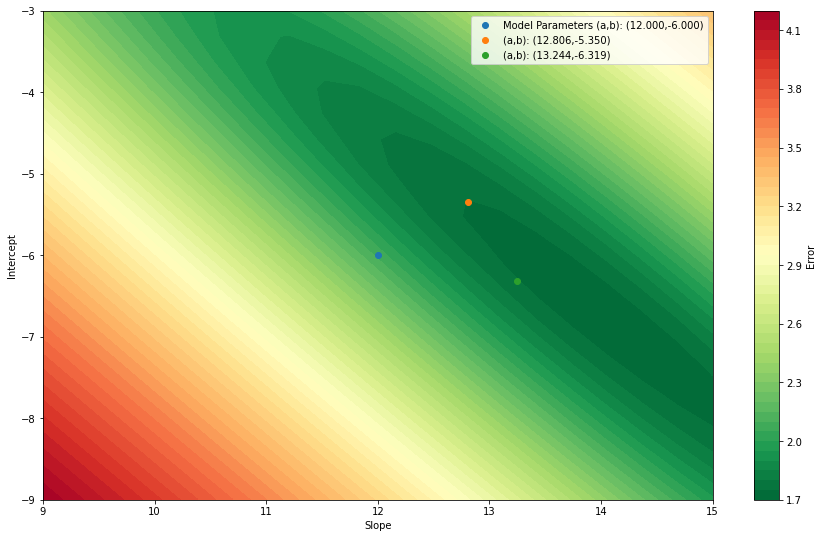

In [9]:
model_1_step = model.copy()
step(model, x, y, lr=5)

plot_local_error(model_or, x, y, range_a=3, range_b=3)
plt.scatter(model_1_step.a, model_1_step.b, label=f'(a,b): ({model_1_step.a:.3f},{model_1_step.b:.3f})')
plt.scatter(model.a, model.b, label=f'(a,b): ({model.a:.3f},{model.b:.3f})')
plt.legend()


## Criando um loop de treinamento

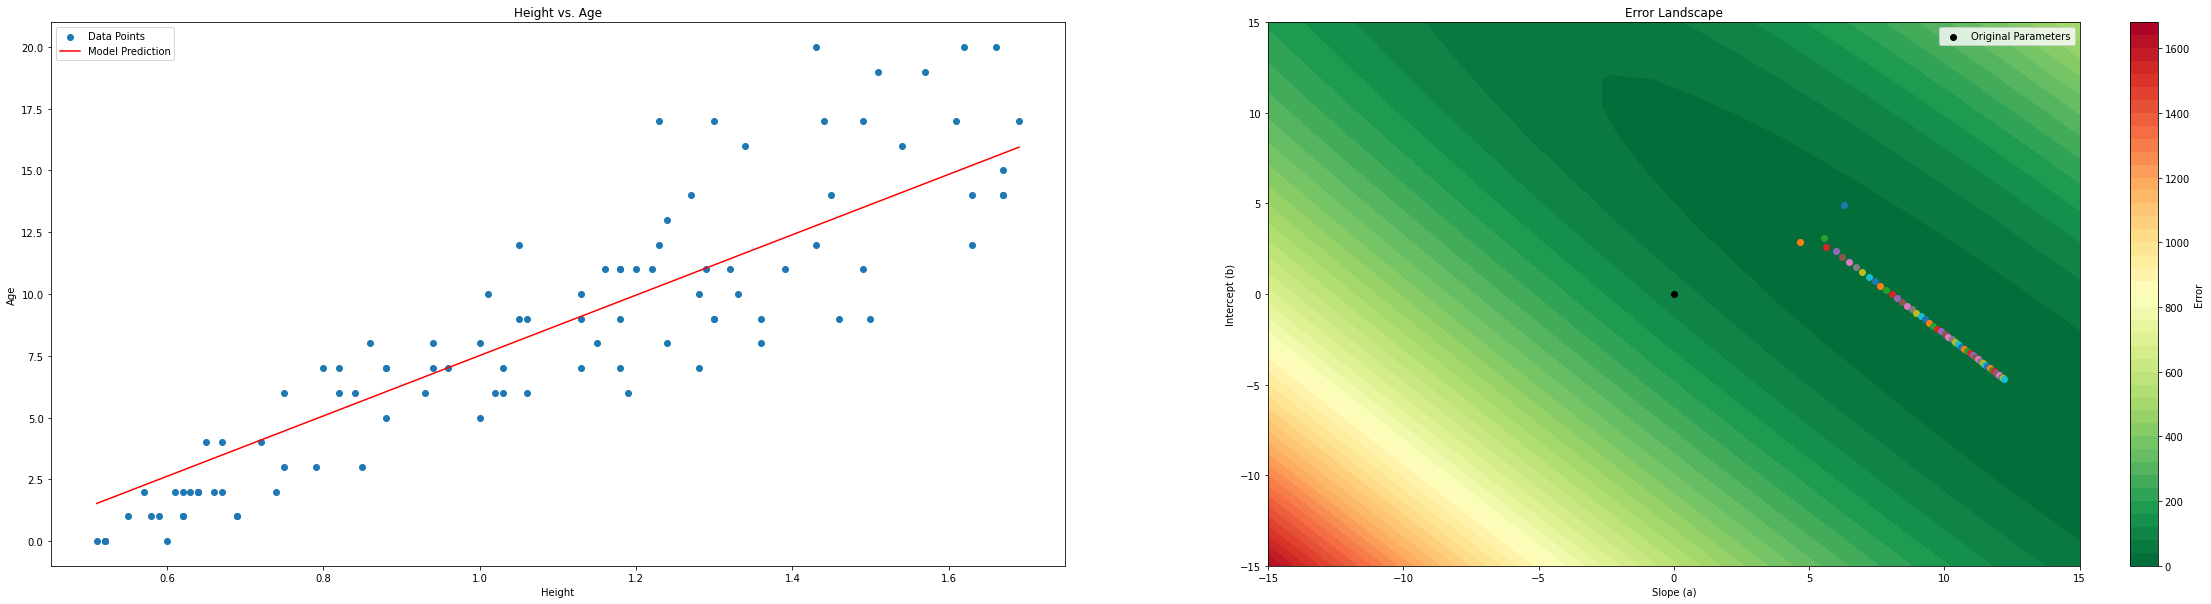

In [10]:
#%%time
from IPython import display

def plot_figure(model, x, y, fig=None):
    # Aplica o modelo para valores entre x.min() e x.max()
    xm = np.linspace(x.min(), x.max())
    ym = model(xm)

    if fig is None:
        error_grid, a_grid, b_grid = get_local_error(model, x, y, range_a=15, range_b=15)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,10))
        # Plot 1
        ax1.scatter(x, y, label='Data Points')
        ax1.plot(xm, ym, c='r', label='Model Prediction')
        ax1.set_xlabel('Height')
        ax1.set_ylabel('Age')
        ax1.set_title('Height vs. Age')
        ax1.legend()
        
        # Plot 2
        contour = ax2.contourf(a_grid, b_grid, error_grid, levels=50, cmap='RdYlGn_r')
        ax2.scatter(model.a, model.b, color='black', label='Original Parameters')
        ax2.set_xlabel('Slope (a)')
        ax2.set_ylabel('Intercept (b)')
        ax2.set_title('Error Landscape')
        ax2.legend()
        # Add colorbar to the second plot
        fig.colorbar(contour, ax=ax2, label='Error')
        plt.close()
    else:
        # Atualiza somente a linha do plot 1 e os pontos do plot 2
        ax1, ax2, _ = fig.axes
        ax1.lines[0].set_data(xm, ym)  # Update model prediction line
        ax2.scatter(model.a, model.b)  # Plot new scatter point
        ax2.legend()
        

    # Remove o plot anterior
    display.clear_output(wait=True) 
    display.display(fig)
    
    return fig

def train(model, x, y, lr, num_epochs):

    fig = plot_figure(model, x, y)

    for epoch in range(0, num_epochs):
        step(model, x, y, lr)
        plot_figure(model, x, y, fig)

model = Model(a=0, b=0)
num_epochs = 50
lr = 0.3
train(model, x, y, lr, num_epochs)

# Regressão Linear com Duas Variáveis

A regressão linear é uma técnica estatística usada para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. No caso de duas variáveis independentes, o modelo de regressão linear pode ser representado como:

$$ y_m = w_1x_1 + w_2x_2 + b $$

## Componentes do Modelo
- **$y_m$**: É a variável dependente que estamos tentando prever. No contexto de um problema prático, pode ser algo como o preço de uma casa, o salário de um funcionário, etc.
- **$x_1$ e $x_2$**: São as variáveis independentes ou preditoras. Essas são as características ou atributos que usamos para prever $y_m$. Por exemplo, $x_1$ pode ser a metragem quadrada de uma casa e $x_2$ o número de quartos.
- **$w_1$ e $w_2$**: São os coeficientes ou pesos associados às variáveis independentes. Eles quantificam a relação entre cada variável independente e a variável dependente. Por exemplo, $w_1$ indica quanto o preço de uma casa aumenta para cada metro quadrado adicional de área.
- **$b$**: É o intercepto ou o termo de viés. Representa o valor de $y_m$ quando todas as variáveis independentes são iguais a zero. Em outras palavras, é o valor base de $y_m$.

## Interpretação do Modelo
A equação $y_m = w_1x_1 + w_2x_2 + b$ descreve um plano no espaço tridimensional. Cada ponto no plano representa uma combinação das variáveis independentes $x_1$ e $x_2$ e o valor correspondente da variável dependente $y_m$.

Text(0.5, 0.92, '3D Scatter Plot of Age vs. Height and Weight')

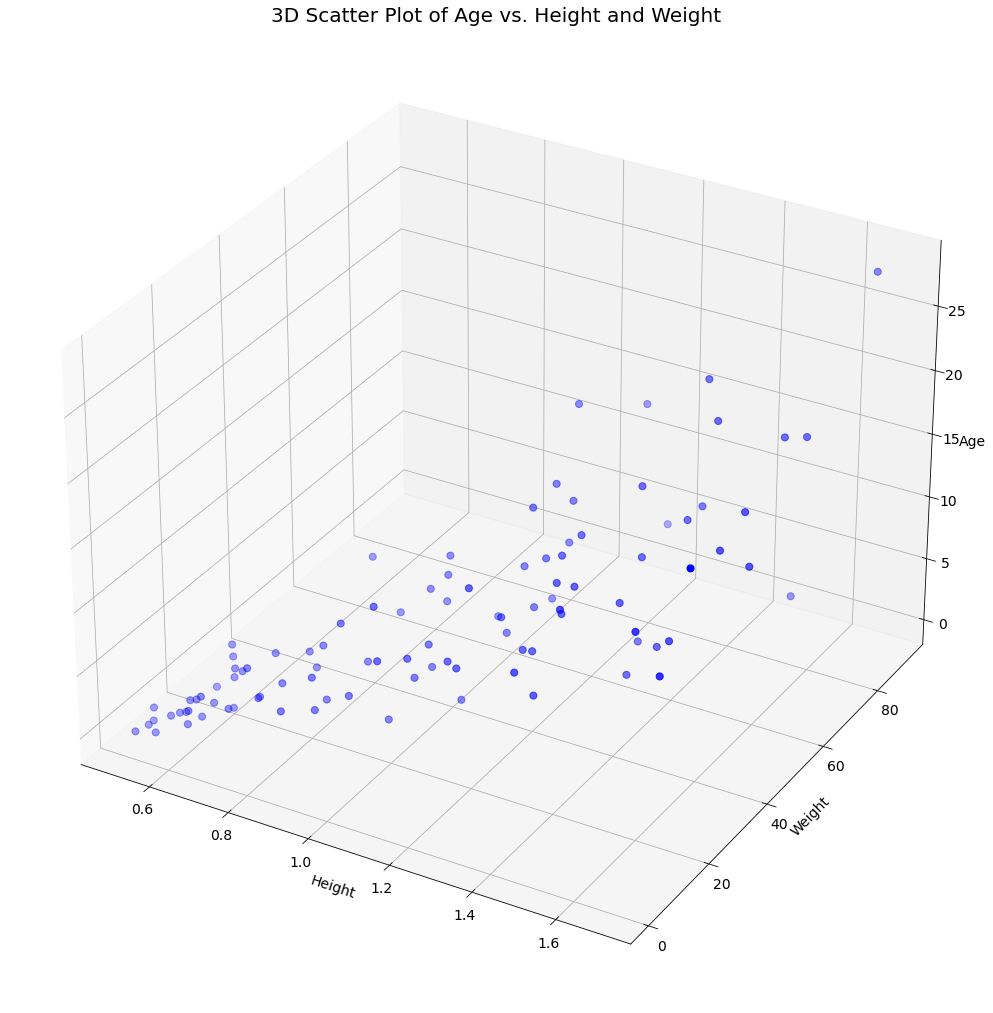

In [11]:
data = np.loadtxt('../data/age_data_2.txt')
x1, x2, y = data.T


fig = plt.figure(figsize=(35, 18))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, c='blue', marker='o', s=50)  
ax.set_xlabel('Height', fontsize=14)
ax.set_ylabel('Weight', fontsize=14)
ax.set_zlabel('Age', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)  # Changed tick size
ax.grid(True, linestyle='--', alpha=0.5)  # Customized gridlines
ax.set_title('3D Scatter Plot of Age vs. Height and Weight', fontsize=20)  

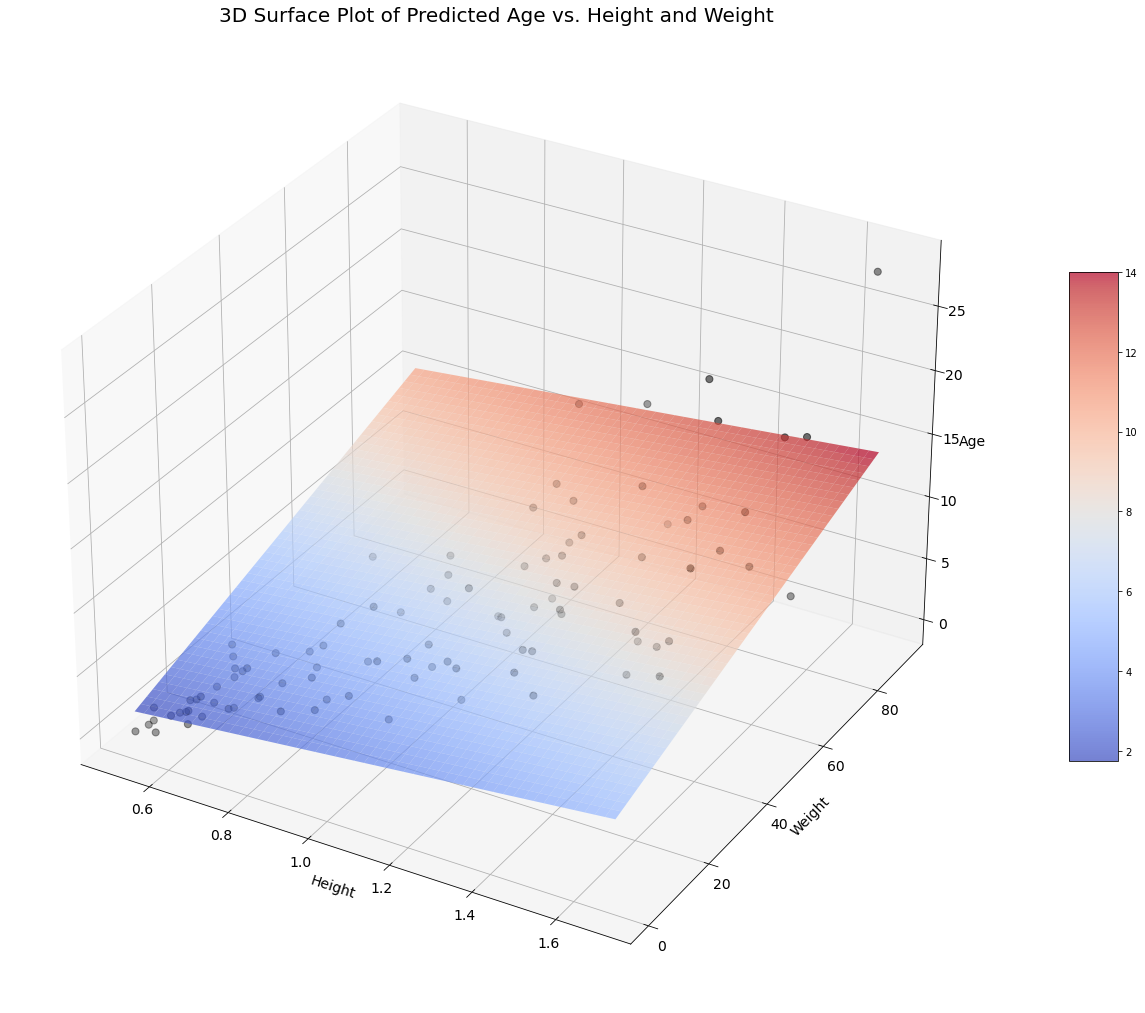

In [12]:
# Descomente para criar uma figura interativa
#%matplotlib widget
class Model:
    '''Modelo linear de dois pesos e um bias.'''

    def __init__(self, w1, w2, b):

        self.w1 = w1
        self.w2 = w2
        self.b = b

    def __call__(self, x1, x2):
        y = self.w1*x1 + self.w2*x2 + self.b
        return  y

model = Model(w1=3., w2=0.1, b=0)
x1m, x2m = np.meshgrid(
    np.linspace(x1.min(), x1.max()),
    np.linspace(x2.min(), x2.max())
    )
ym = model(x1m, x2m)

""" fig = plt.figure(figsize=(30,18))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, c='black')
ax.plot_surface(x1m, x2m, ym)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age') """

# 3D Surface Plot
fig = plt.figure(figsize=(30, 18))
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y, c='black', marker='o', s=50)  # Same as scatter plot
surf = ax.plot_surface(x1m, x2m, ym, cmap='coolwarm', alpha=0.7)  # Added color map and transparency
ax.set_xlabel('Height', fontsize=14)
ax.set_ylabel('Weight', fontsize=14)
ax.set_zlabel('Age', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)  # Same as scatter plot
ax.grid(True, linestyle='--', alpha=0.5)  # Same as scatter plot
ax.set_title('3D Surface Plot of Predicted Age vs. Height and Weight', fontsize=20)  # Added title
fig.colorbar(surf, shrink=0.5, aspect=10)  # Added color bar for the surface

# Otimização por Gradiente Descendente para Regressão Linear com Duas Variáveis

Dada a equação da regressão linear com duas variáveis:

$$
 y_m = w_1x_1 + w_2x_2 + b 
$$

## Cálculo dos Gradientes
Para aplicar o gradiente descendente, precisamos calcular o gradiente da função de custo em relação a cada parâmetro:

- **Gradiente em relação a $w_1$**:
  $$
   \frac{\partial MSE}{\partial w_1} = -\frac{2}{n}\sum_{i=1}^{n} (y_i - w_1x_{1,i} - w_2x_{2,i} - b)x_{1,i} 
  $$

- **Gradiente em relação a $w_2$**:
  $$
   \frac{\partial MSE}{\partial w_2} = -\frac{2}{n}\sum_{i=1}^{n} (y_i - w_1x_{1,i} - w_2x_{2,i} - b)x_{2,i} 
  $$

- **Gradiente em relação a $b$**:
  $$
   \frac{\partial MSE}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n} (y_i - w_1x_{1,i} - w_2x_{2,i} - b) 
  $$

## Atualização dos Parâmetros
Em cada iteração do gradiente descendente, os parâmetros são atualizados da seguinte forma:

- **Atualização de $w_1$**:
  $$
   w_1 \leftarrow w_1 - \alpha \frac{\partial MSE}{\partial w_1} 
  $$

- **Atualização de $w_2$**:
  $$
   w_2 \leftarrow w_2 - \alpha \frac{\partial MSE}{\partial w_2} 
  $$

- **Atualização de $b$**:
  $$
   b \leftarrow b - \alpha \frac{\partial MSE}{\partial b} 
  $$

onde $\alpha$ é a taxa de aprendizado, que controla o tamanho do passo em cada iteração.

## Convergência
O processo de atualização dos parâmetros é repetido até que a função de custo convirja para um valor mínimo ou até que seja atingido um número máximo de iterações. Os valores finais de $w_1$, $w_2$ e $b$ são os parâmetros ótimos que minimizam a função de custo.

In [13]:
def mse(model, x1, x2, y):

    ym = model(x1, x2)
    error = np.mean((y-ym)**2)

    return error

def mse_grad(model, x1, x2, y):

    n = len(x1)
    ym = model(x1, x2)
    gw1 = -2*np.sum((y-ym)*x1)/n
    gw2 = -2*np.sum((y-ym)*x2)/n
    gb = -2*np.sum(y-ym)/n

    return gw1, gw2, gb

def step(model, x1, x2, y, lr):

    grad = mse_grad(model, x1, x2, y)
    model.w1 = model.w1 - lr*grad[0]
    model.w2 = model.w2 - lr*grad[1]
    model.b = model.b - lr*grad[2]
    

    return model

In [14]:
from matplotlib.lines import Line2D

def plot_figure(model, x1, x2, y, fig=None):
    # Aplica o modelo para valores entre x.min() e x.max()
    xm = np.linspace(x1.min(), x1.max(), 100)
    ym = np.linspace(x2.min(), x2.max(), 100)
    x1m, x2m = np.meshgrid(xm, ym)
    ym = model(x1m, x2m)

    if fig is None:
        fig = plt.figure(figsize=(40, 20))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')
        
        # Plot 1: Pontos de dados
        ax1.scatter(x1, x2, y, c='b', label='Data Points')
        ax1.set_xlabel('Height')
        ax1.set_ylabel('Weight')
        ax1.set_zlabel('Age')
        ax1.set_title('Data Scatter: Age vs. Height and Weight')
        
        # Plot 2: Superfície do modelo
        ax2.plot_surface(x1m, x2m, ym, color='r', alpha=0.7, label='Model Prediction')
        ax2.scatter(x1, x2, y, c='b', label='Data Points')
        ax2.set_xlabel('Height')
        ax2.set_ylabel('Weight')
        ax2.set_zlabel('Age')
        ax2.set_title('Model Surface: Age vs. Height and Weight')
        
        
        # Create a legend with proxy artists
        model_legend = Line2D([0], [0], linestyle="none", c='r', marker='s')
        data_legend = Line2D([0], [0], linestyle="none", c='b', marker='o')
        ax1.legend([data_legend], ['Data Points'], numpoints=1)
        ax2.legend([model_legend], ['Model Prediction'], numpoints=1)

        plt.close()
    else:
        ax1, ax2 = fig.axes
        # Atualiza a superfície do modelo
        ax2.collections[0].remove()  # Remove a superfície anterior
        ax2.plot_surface(x1m, x2m, ym, color='r', alpha=0.2)  # Adiciona a nova superfície
        ax2.scatter(x1, x2, y, c='b', label='Data Points')

    # Remove o plot anterior
    display.clear_output(wait=True)
    display.display(fig)

    return fig

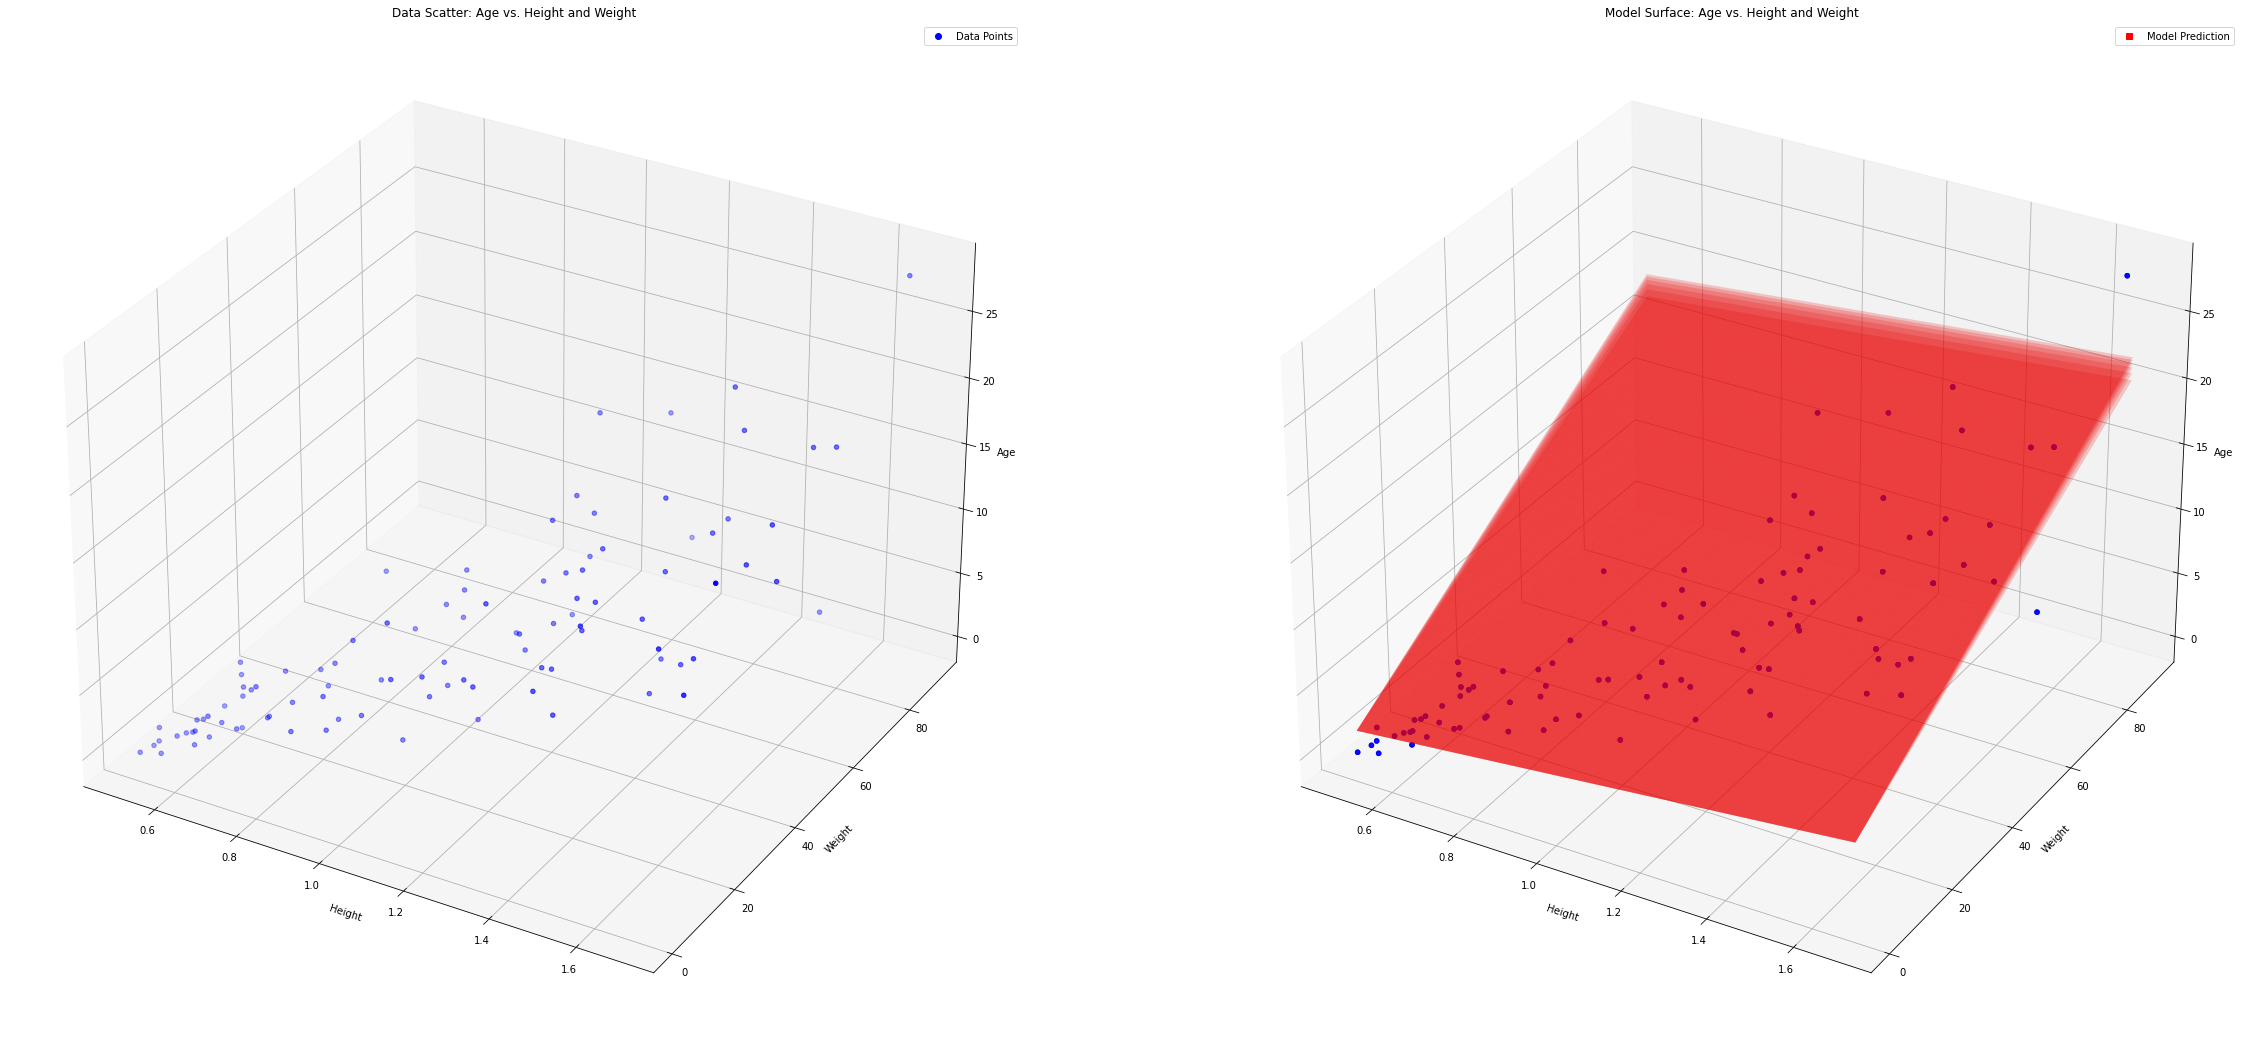

In [19]:
def train(model, x1, x2, y, lr, num_epochs):
    fig = plot_figure(model, x1, x2, y)

    for epoch in range(num_epochs):
        step(model, x1, x2, y, lr)
        plot_figure(model, x1, x2, y, fig)
        
model = Model(w1=3., w2=0.1, b=0)
num_epochs = 10
lr = 0.0001
train(model, x1, x2, y, lr, num_epochs)